In [2]:
import pathlib
import json
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
# !pip install folium
import folium

from collections import Counter

In [24]:
tqdm?

Init signature: tqdm(*_, **__)
Docstring:     
Decorate an iterable object, returning an iterator which acts exactly
like the original iterable, but prints a dynamically updating
progressbar every time a value is requested.
Init docstring:
Parameters
----------
iterable  : iterable, optional
    Iterable to decorate with a progressbar.
    Leave blank to manually manage the updates.
desc  : str, optional
    Prefix for the progressbar.
total  : int or float, optional
    The number of expected iterations. If unspecified,
    len(iterable) is used if possible. If float("inf") or as a last
    resort, only basic progress statistics are displayed
    (no ETA, no progressbar).
    If `gui` is True and this parameter needs subsequent updating,
    specify an initial arbitrary large positive number,
    e.g. 9e9.
leave  : bool, optional
    If [default: True], keeps all traces of the progressbar
    upon termination of iteration.
    If `None`, will leave only if `position` is `0`.
file  : `

In [28]:
import os
import zipfile
    
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in tqdm(files, position=0, leave=True, desc=f"Zip {folder_name}"):
            ziph.write(os.path.join(root, file), 
                       os.path.relpath(os.path.join(root, file), 
                                       os.path.join(path, '..')))
            
def write_zip_archive(folder_name): 
    zip_fname = f"archives/{folder_name}.zip"
    with zipfile.ZipFile(zip_fname, 'w', zipfile.ZIP_DEFLATED) as zipf:
        zipdir(f"{folder_name}", zipf)

In [29]:
folders_list = [p for p in pathlib.Path().iterdir() if 'trans_data_' in str(p)]
for folder_name in folders_list: 
    write_zip_archive(folder_name)


Zip trans_data_30_SEP_2022: 100%|██████████| 57584/57584 [00:16<00:00, 3550.89it/s]


In [30]:
zipfile.ZipFile?

NameError: name 'ziph' is not defined

In [18]:
datetime.strptime("01_OCT_2022", '%d_%b_%Y')

datetime.datetime(2022, 10, 1, 0, 0)

In [ ]:
from concurrent.futures import ThreadPoolExecutor

def read_json_TPE(f_path): 
    try:
        with open(f_path, 'r', encoding = 'utf-8') as file: 
            return (json.load(file), None)
    except: 
        print(f"Unable to open : {f_path}")
        return (None, file)
    
    
folders_list = [p for p in pathlib.Path().iterdir() if 'trans_data_' in str(p)]
folders_list = sorted(folders_list, key=lambda x: datetime.strptime(str(x)[11:], '%d_%b_%Y'))[:-1]
for folder in folders_list: 
    fpaths_list = list(folder.iterdir())
    fpaths_list = sorted(fpaths_list)
    print(f"{folder} - {len(fpaths_list)}")

    with ThreadPoolExecutor(max_workers=40) as executor:
        fpath_list = fpaths_list
        results = list(tqdm(executor.map(read_json_TPE, fpath_list), total=len(fpath_list)))
        
    print(f"{[r for r in results if r[0] is None]}")

trans_data_18_SEP_2022 - 55253


100%|██████████| 55253/55253 [00:01<00:00, 29860.23it/s] 


[]
trans_data_19_SEP_2022 - 58722


100%|██████████| 58722/58722 [00:00<00:00, 88365.48it/s] 


[]
trans_data_20_SEP_2022 - 57883


 62%|██████▏   | 35970/57883 [01:01<00:47, 458.00it/s]

[]

In [6]:
for fpath in error_files: 
    try:
        with open(fpath, 'r', encoding = 'utf-8') as file:
            splt = file.readline().split("}}")
            if len(splt) != 3: 
                print(f"{fpath} split size {len(splt)} => skipped")
                continue
                
            res = json.loads(splt[0] + "}}")
            print(res.keys() )
            
        with open(fpath, 'w', encoding = 'utf-8') as out_f: 
            json.dump(res, out_f, ensure_ascii=False)

    except: 
        print(fpath, "error")

trans_data_18_SEP_2022\trans_2022-09-18 17;32;52.json split size 2 => skipped
trans_data_18_SEP_2022\trans_2022-09-18 17;35;10.json split size 2 => skipped
trans_data_18_SEP_2022\trans_2022-09-18 17;35;15.json split size 2 => skipped


In [20]:
# error_files

In [7]:
for indx, f_path in tqdm(enumerate(error_files)):
    try:
        with open(f_path, 'r', encoding = 'utf-8') as file: 
            rq_cur = json.load(file)
    except: 
        print(f_path)
        continue
        
    total_records_num += [len(rq_cur)]
    prev_keys = set(rq_prev.keys() )
    try:
        cur_keys = set(rq_cur.keys() )
    except: 
        print(f_path)
        continue
                
    for imei in prev_keys.intersection(cur_keys):
        if rq_prev[imei] != rq_cur[imei]: 
            optimized_data_list += [rq_cur[imei]]
            for field_name in rq_prev[imei].keys():
                if rq_prev[imei][field_name] != rq_cur[imei][field_name]: 
                    changing_fields_list += [field_name]

    for imei in cur_keys.difference(prev_keys):
        optimized_data_list += [rq_cur[imei]]
#         print(f"New imei {imei}")
            
    rq_prev = rq_cur

3it [00:00, 3752.73it/s]


In [15]:
# error_files = error_files[:34]

In [8]:
Counter(changing_fields_list), sum(total_records_num), len(optimized_data_list), sum(total_records_num) / len(optimized_data_list)

(Counter({'gpstime': 2298,
          'lat': 2339,
          'lng': 2338,
          'speed': 2304,
          'orientation': 2282,
          'inDepo': 7}),
 173295,
 172405,
 1.0051622632754271)

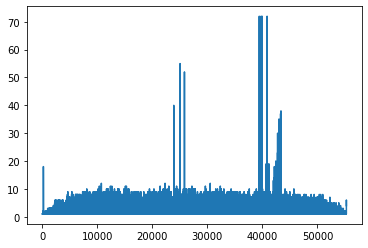

In [9]:
plt.plot(total_records_num)

In [10]:
sum_df = pd.DataFrame(optimized_data_list)

In [11]:
sum_df.to_csv(f"data_for_{DATEBASE_NAME}.csv", encoding='utf-8', index=False, header='true')

In [12]:
sum_df['imei'].value_counts()[:10]

355227046638821    5016
355227046450946    4328
355227045539921    4174
355227046504098    4052
355227045600871    3920
355227046447371    3870
355227046451290    3833
355227045600988    3829
355227045540192    3800
355227046451530    3591
Name: imei, dtype: int64

In [173]:
sum_df['imei'].value_counts()[-20:-10]

355227045371655    554
355227046451464    461
355227046505244    390
355227046283032    312
355227045600830    301
355227045369527    298
355227046451332    290
355227046507810    230
355227045540127    185
355227045540234    102
Name: imei, dtype: int64

In [13]:
vehicle_df = sum_df[sum_df['imei'] == '355227045600988']
# vehicle_df = sum_df[sum_df['imei'] == '355227045369527']

vehicle_df.head(5)

,id,imei,name,stateCode,stateName,lat,lng,speed,orientation,gpstime,routeId,routeName,routeColour,inDepo,busNumber,perevId,perevName,remark,online,idBusTypes
251,243,355227045600988,A158,used,used,48.251615,25.940343,000.0,000.00,2022-09-17 22:37:58,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
542,243,355227045600988,A158,used,used,48.251615,25.940343,000.0,000.00,2022-09-18 03:19:08,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
549,243,355227045600988,A158,used,used,48.251575,25.940482,003.5,000.00,2022-09-18 03:22:00,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
550,243,355227045600988,A158,used,used,48.251613,25.940728,002.3,000.00,2022-09-18 03:22:18,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
554,243,355227045600988,A158,used,used,48.251658,25.940742,000.0,000.00,2022-09-18 03:22:39,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2


In [14]:
vehicle_df

,id,imei,name,stateCode,stateName,lat,lng,speed,orientation,gpstime,routeId,routeName,routeColour,inDepo,busNumber,perevId,perevName,remark,online,idBusTypes
251,243,355227045600988,A158,used,used,48.251615,25.940343,000.0,000.00,2022-09-17 22:37:58,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
542,243,355227045600988,A158,used,used,48.251615,25.940343,000.0,000.00,2022-09-18 03:19:08,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
549,243,355227045600988,A158,used,used,48.251575,25.940482,003.5,000.00,2022-09-18 03:22:00,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
550,243,355227045600988,A158,used,used,48.251613,25.940728,002.3,000.00,2022-09-18 03:22:18,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
554,243,355227045600988,A158,used,used,48.251658,25.940742,000.0,000.00,2022-09-18 03:22:39,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172372,243,355227045600988,A158,used,used,48.251705,25.939603,009.2,119.04,2022-09-18 22:53:34,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
172373,243,355227045600988,A158,used,used,48.251657,25.939993,010.1,088.64,2022-09-18 22:53:37,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
172375,243,355227045600988,A158,used,used,48.251608,25.940352,001.0,000.00,2022-09-18 22:53:56,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
172377,243,355227045600988,A158,used,used,48.251597,25.940370,000.0,000.00,2022-09-18 22:54:16,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2


In [15]:
vehicle_df[['routeName', 'routeColour']].value_counts()

routeName  routeColour
8T         coral          3829
dtype: int64

In [16]:
import matplotlib as mpl

cm = mpl.cm.get_cmap('jet')
# viridis = mpl.colormaps['viridis'].resampled(8)

In [19]:
trace = vehicle_df[['lat', 'lng']].values

m = folium.Map(
    location=np.mean(trace, axis=0), 
    zoom_start=12, height='50%', width='55%'
    )

plot_coloured_route(trace, m)

m

In [18]:
def rgb_to_hex(r, g, b):
    return f'{r:02x}{g:02x}{b:02x}'


def plot_coloured_route(route, folium_map, color_map=mpl.cm.get_cmap('jet'), bins=10):
    bins = min(bins, len(route))
    
    lspace = np.linspace(0, len(route), num=bins+1, dtype=int)
    
    for i, (lb, rb) in enumerate(zip(lspace[:-1], lspace[1:]) ):
        clr = rgb_to_hex(*tuple(map(lambda x : int(x*255), cm(i/bins) ))[:3])
        folium.PolyLine(
            route[lb:rb+1, :],
            color=f"#{clr}", weight=2,
            opacity=0.8
        ).add_to(folium_map)

In [16]:
# result_list

In [20]:
# df.value_counts()
'id', 'imei', 'name', 'stateCode', 'stateName', 'lat', 'lng', 'speed',
       'orientation', 'gpstime', 'routeId', 'routeName', 'routeColour',
       'inDepo', 'busNumber', 'perevId', 'perevName', 'remark', 'online',
       'idBusTypes'
df.keys()

Index(['id', 'imei', 'name', 'stateCode', 'stateName', 'lat', 'lng', 'speed',
       'orientation', 'gpstime', 'routeId', 'routeName', 'routeColour',
       'inDepo', 'busNumber', 'perevId', 'perevName', 'remark', 'online',
       'idBusTypes'],
      dtype='object')

In [29]:
# df['gpstime'].value_counts()
max(sum_df['gpstime']), min(sum_df['gpstime'])

('2022-09-09 22:59:57', '2022-09-08 19:36:01')

In [31]:
len(sum_df['gpstime'].unique()), len(sum_df['gpstime'])

(49461, 224505)

In [32]:
updata_tm = [datetime.strptime(dt, '%Y-%m-%d %H:%M:%S').timestamp() for dt in sum_df['gpstime'].unique() ]
updata_tm_np = np.array(updata_tm)

In [33]:
max(updata_tm_np[1:] - updata_tm_np[:-1])

15462.0

In [34]:
updata_tm_np[1:] - updata_tm_np[:-1]

array([ 1.1000e+01,  3.0000e+00,  7.0000e+00, ...,  7.0000e+00,
       -2.7304e+04,  1.1349e+04])

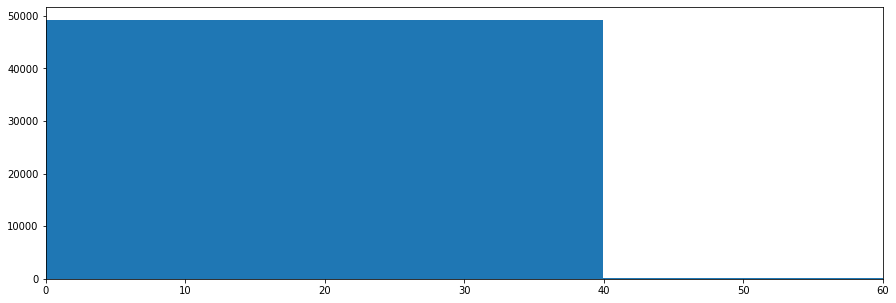

In [35]:
plt.figure(figsize=(15, 5))
plt.hist(updata_tm_np[1:] - updata_tm_np[:-1], bins=391)
plt.xlim(0, 60)
plt.show()

In [36]:
df.keys()

NameError: name 'df' is not defined

In [119]:
d = datetime.now()

In [121]:
d.microsecond > 1_000

343015

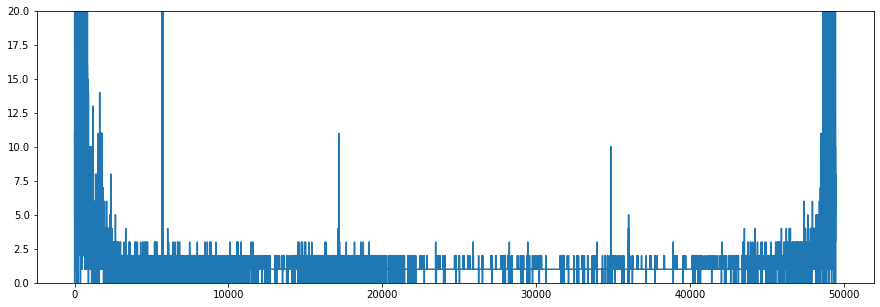

In [37]:
plt.figure(figsize=(15, 5))
plt.plot(updata_tm_np[1:] - updata_tm_np[:-1])
plt.ylim(0, 20)
plt.show()

In [38]:
np.histogram(updata_tm_np[1:] - updata_tm_np[:-1], bins=391)

(array([    1,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
datetime.strftime('%Y-%m-%d %H;%M;%S')

In [54]:
datetime.strptime('2022-09-05 22:09:58', '%Y-%m-%d %H:%M:%S').timestamp()

1662404998.0

In [35]:
df.iloc[-1]

id                              75
imei               355227045369527
name                            A6
stateCode                     used
stateName                     used
lat                      48.326433
lng                      25.930175
speed                        000.0
orientation                 000.00
gpstime        2022-09-05 22:09:58
routeId                         17
routeName                       23
routeColour                    red
inDepo                       False
busNumber                     3557
perevId                         12
perevName              Vitaliy2019
remark                 3557 DNSNK 
online                        True
idBusTypes                       1
Name: 47737, dtype: object

In [109]:
# for f_path in files_list[:1]:
#     with open(f_path, 'r', encoding = 'utf-8') as file: 
#         response = json.load(file)
        
# for _ in range(5):
#     with open("test_mult_w.json", 'a') as out_f: 
#         json.dump(response, out_f, ensure_ascii=False)
#         out_f.write('\n')

In [41]:
for _ in range(5):
    with open("test_mult_w.json", 'a') as out_f: 
        json.dump(response, out_f, ensure_ascii=False)
        out_f.write('\n')